In [116]:
import sys
import aa_py
%matplotlib inline
%load_ext autoreload
%autoreload 2
from orbit import *
sys.path.append('/home/jls/work/code/nbody/')
from nbody_tools import Vc_NFW, get_times, shrinking_centre
import json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
sys.path.append('/home/jls/work/data/torques/')
from sim_setup import grab_snapshot, 
ndata = 

In [164]:
dd = pd.read_csv('tmp', skiprows=15, sep='\s+')

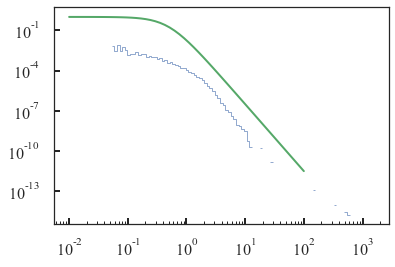

In [165]:
cofm,rm = shrinking_centre(dd.values)
rr=np.sqrt((dd.values.T[1]-cofm[0])**2+(dd.values.T[2]-cofm[1])**2+(dd.values.T[3]-cofm[2])**2)

minr = np.percentile(rr, 0.5)
maxr = np.percentile(rr, 99.5)
b = np.logspace(np.log10(minr),np.log10(maxr),100)

plt.hist(rr[6000:], weights=(dd.values.T[0]/rr**3)[6000:],histtype='step',bins=b)
plt.semilogy()
plt.semilogx()
RR = np.logspace(-2.,2.)
plt.plot(RR,1./(1.+(RR/0.5)**2)**2.5)

In [166]:
minr, maxr

(0.052898433531771476, 1538.788660641929)

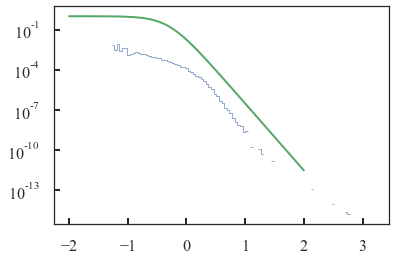

In [167]:
plt.hist(np.log10(rr[6000:]), weights=(dd.values.T[0]/rr**3)[6000:],histtype='step',
         bins=100,range=[np.log10(minr),np.log10(maxr)])
plt.semilogy()
RR = np.logspace(-2.,2.)
plt.plot(np.log10(RR),1./(1.+(RR/0.5)**2)**2.5)

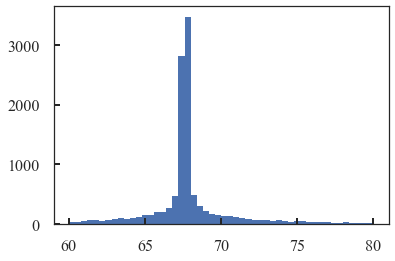

In [115]:
plt.hist(dd.values.T[3],bins=50,range=[60.,80.]);

In [39]:
data = pd.read_csv('/data/jls/m2m/CraterII/vmax_universal/old_versions/2comp_cuspplum_nfw_SP_2_PM_5_ca_10_properties.csv')
info = json.load(open('/data/jls/m2m/CraterII/vmax_universal/old_versions/2comp_cuspplum_nfw_SP_2_PM_5_ca_10.simlog'))

propermotion = np.array([0.05, 0.]) + crater2_solarreflex()
# 2. Orbital properties
Eq = np.array([crater2_eq()[0], crater2_eq()[1], distance, vlos,
               propermotion[0], propermotion[1]])
R, T = integrate_orbits_backwards(Eq)
    

In [40]:
print info

{"ca": 1.0, "simFileGRAVINPUT_scaled": "/data/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_2_PM_5_ca_10_init_sc.ini", "rtidal": 11.388037953912862, "pot": "GalPot", "sim_name": "2comp_cuspplum_nfw_SP_2_PM_5_ca_10", "simFile": "/data/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_2_PM_5_ca_10", "rs": 0.9, "Rscale": 1.8, "Mscale": 1359092818.5648282, "Delta": 101.1, "Omega": 0.0, "tfac": 0.2, "potfile": "/home/jls/work/code/Torus/pot/PJM16_best.Tpot", "potpars": null, "simFileDM": "/data/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_2_PM_5_ca_10_dm", "NDM": 100000, "ba": 1.0, "G": 4.4986613818207175e-06, "MtoL": 30.024040195075901, "sim_folder": "/data/jls/m2m/CraterII/vmax_universal/", "Ms": 11452548.960751515, "simFileGRAVOUTPUT": "/data/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_2_PM_5_ca_10.snp", "XV": [77.124906110344753, -61.854489542243151, -83.794797413330585, 1.524675678810133, 20.9032521203738, -4.4418823102819438], "c": 20.0, "simFileGRAVLOG"

In [56]:
MM = mass_loss(pericentre(R),apocentre(R),1,1.8,Delta=101.1)

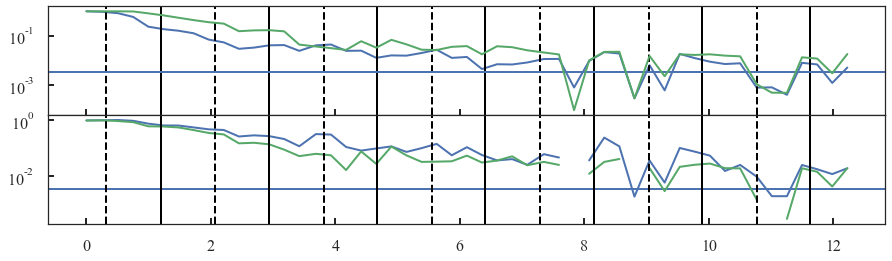

In [58]:
f,a=plt.subplots(2,1,figsize=[15.,4.])
plt.subplots_adjust(hspace=0.)
plt.sca(a[0])
plt.plot(data['times'],data['mass_dm']/data['mass_dm'][0]);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.axhline(MM)

plt.plot(data['times'],data['mass_st']/data['mass_st'][0]);plt.semilogy()

plt.sca(a[1])
plt.axhline(MM)
plt.plot(data['times'],data['mass_dm_core']/data['mass_dm_core'][0]);plt.semilogy()
plt.plot(data['times'],data['mass_st_core']/data['mass_st_core'][0]);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
# plt.plot(data['times'],np.exp(-(data['times']/0.5)**0.2))

[]

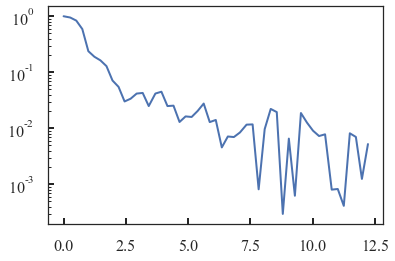

In [79]:
plt.plot(data['times'],data['mass_dm']/data['mass_dm'][0]);plt.semilogy()

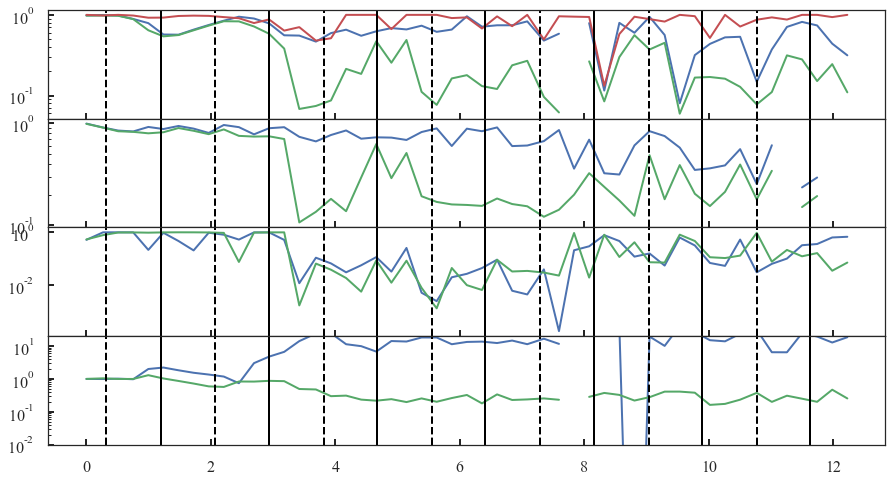

In [42]:
f,a=plt.subplots(4,1,figsize=[15.,8.])
plt.subplots_adjust(hspace=0.)
plt.sca(a[0])
plt.plot(data['times'],data['ba_st']);plt.semilogy()
plt.plot(data['times'],data['ca_st']);plt.semilogy()
plt.plot(data['times'],1.-data['eps']);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.sca(a[1])
plt.plot(data['times'],data['ba_dm']);plt.semilogy()
plt.plot(data['times'],data['ca_dm']);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.sca(a[2])
plt.plot(data['times'],data['align_dm']);plt.semilogy()
plt.plot(data['times'],data['align_st']);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.sca(a[3])
plt.plot(data['times'],data['r_half']/data['r_half'][0]);plt.semilogy()
plt.plot(data['times'],data['sig_maj']/data['sig_maj'][0]);plt.semilogy()
plt.ylim(0.01,20.)
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];

[]

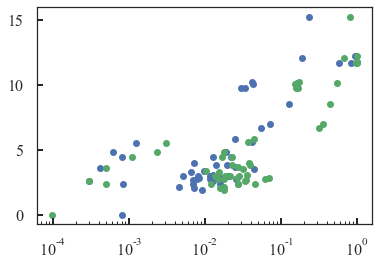

In [46]:
plt.plot(data['mass_dm']/data['mass_dm'][0],data['sig_maj'],'.')
plt.plot(data['mass_st']/data['mass_st'][0],data['sig_maj'],'.')
plt.semilogx()

[]

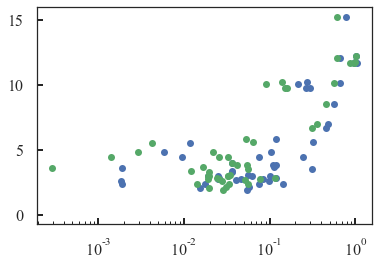

In [45]:
plt.plot(data['mass_dm_core']/data['mass_dm_core'][0],data['sig_maj'],'.')
plt.plot(data['mass_st_core']/data['mass_st_core'][0],data['sig_maj'],'.')
plt.semilogx()

[]

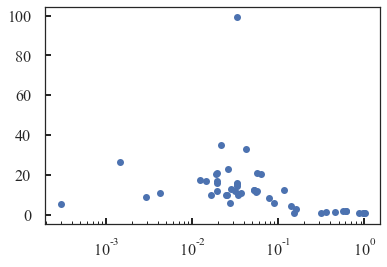

In [44]:
plt.plot(data['mass_st_core']/data['mass_st_core'][0],data['r_half'],'.')
plt.semilogx()

[]

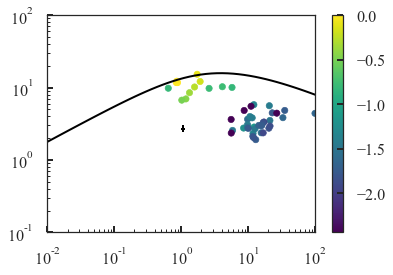

In [78]:
plt.scatter(data['r_half'],data['sig_maj'],
            c=np.log10(data['mass_st']/data['mass_st'][0]),cmap=plt.cm.viridis,s=40,
            vmin=np.log10(MM),vmax=0.)
rr = np.logspace(-2.,2.)
plt.plot(rr,Vc_NFW(rr,1.8,c=20.,Delta=101.1)/np.sqrt(2.5),color='k')
crater2_slos, crater2_slos_err = 2.7, 0.3
crater2_rh, crater2_rh_err = 1.066, 0.084
plt.errorbar([crater2_rh],[crater2_slos],xerr=[crater2_rh_err],yerr=[crater2_slos_err],c='k',ms=5)
plt.ylim(0.1,100.)
plt.xlim(.01,100.)
# plt.
plt.colorbar()
plt.semilogy()
plt.semilogx()